In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from sklearn.preprocessing import StandardScaler

In [ ]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [ ]:


def get_correlated_dataset(n, dependency, mu, scale):
    latent = np.random.randn(n, 2)
    dependent = latent.dot(dependency)
    scaled = dependent * scale
    scaled_with_offset = scaled + mu
    # return x and y of the new, correlated dataset
    return scaled_with_offset[:, 0], scaled_with_offset[:, 1]

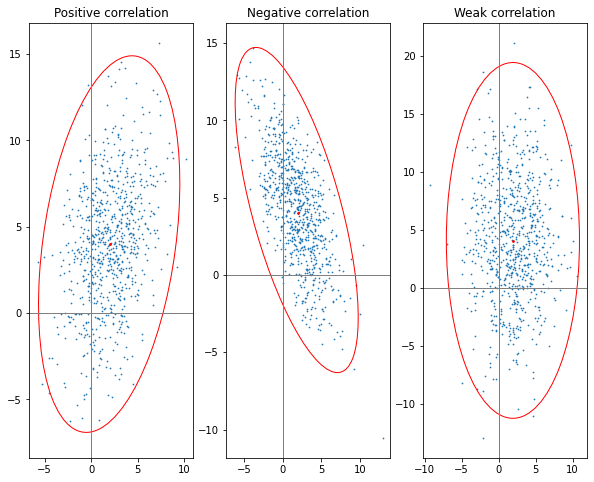

In [ ]:
np.random.seed(0)

PARAMETERS = {
    'Positive correlation': [[0.85, 0.35],
                             [0.15, -0.65]],
    'Negative correlation': [[0.9, -0.4],
                             [0.1, -0.6]],
    'Weak correlation': [[1, 0],
                         [0, 1]],
}

mu = 2, 4
scale = 3, 5

fig, axs = plt.subplots(1, 3, figsize=(10, 8))
for ax, (title, dependency) in zip(axs, PARAMETERS.items()):
    x, y = get_correlated_dataset(800, dependency, mu, scale)
    ax.scatter(x, y, s=0.5)

    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)

    confidence_ellipse(x, y, ax, edgecolor='red')

    ax.scatter(mu[0], mu[1], c='red', s=3)
    ax.set_title(title)

plt.show()

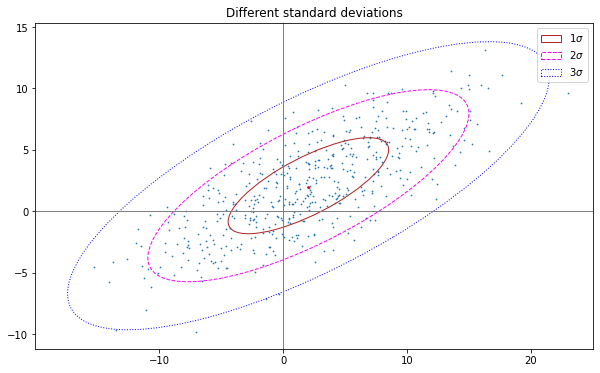

In [ ]:
fig, ax_nstd = plt.subplots(figsize=(10, 6))

dependency_nstd = [[0.8, 0.75],
                   [-0.2, 0.35]]
mu = 2, 2
scale = 8, 5

ax_nstd.axvline(c='grey', lw=1)
ax_nstd.axhline(c='grey', lw=1)

x, y = get_correlated_dataset(500, dependency_nstd, mu, scale)
ax_nstd.scatter(x, y, s=0.5)

confidence_ellipse(x, y, ax_nstd, n_std=1,
                   label=r'$1\sigma$', edgecolor='firebrick')
confidence_ellipse(x, y, ax_nstd, n_std=2,
                   label=r'$2\sigma$', edgecolor='fuchsia', linestyle='--')
confidence_ellipse(x, y, ax_nstd, n_std=3,
                   label=r'$3\sigma$', edgecolor='blue', linestyle=':')

ax_nstd.scatter(mu[0], mu[1], c='red', s=3)
ax_nstd.set_title('Different standard deviations')
ax_nstd.legend()
plt.show()


In [ ]:
def plot_scatter(x,y,title_x = '', title_y = ''):
    fig = plt.figure(figsize=(10,7))
    plt.grid()

    plt.scatter(x,y,
                alpha = 0.5, s = 196,
                c = 'orange', edgecolor = 'r')
    plt.xlabel(title_x,fontsize=35)
    plt.ylabel(title_y,fontsize=35)
    plt.xticks(FontSize = 25)
    plt.yticks(FontSize = 25);
    plt.xlim([-20,20])
    plt.ylim([-20,20])
    plt.tight_layout();

In [ ]:
x.shape

(500,)

In [ ]:
y.shape

(500,)

In [ ]:
def data_normalisation(scaled_data):
    for col in scaled_data.columns: #iterate over each column
        scaled_data[col] = (scaled_data[col]-scaled_data[col].mean())/scaled_data[col].std() #data normalisation 
    
    return scaled_data

In [ ]:
def covariance_calculation(mean_subtracted):
    #calcualte covariance amongst scaled values
    for col in mean_subtracted.columns:
        mean_subtracted[col] = mean_subtracted[col]-mean_subtracted[col].mean()
        
    return np.dot(mean_subtracted.T,mean_subtracted)/(len(mean_subtracted) - 1)


In [ ]:
label0=np.array(x)
label=np.array(y)
l=np.array([label0,label])
dataset=pd.DataFrame(l)

In [ ]:
dataset


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,6.377629,3.659427,7.821971,0.592079,-2.418609,14.352094,7.556187,7.668888,0.980168,-0.514347,...,4.125362,-11.209907,4.819911,3.847058,-1.263091,6.888017,-6.468207,10.740743,-1.583141,4.663150
1,1.654470,4.289875,4.450622,4.476645,-0.691808,10.054681,6.063114,6.624192,0.756678,2.294556,...,2.435248,-5.409501,1.213289,3.771223,-0.244340,5.651744,1.249904,4.926483,-1.801694,5.382803


In [ ]:
label0=np.array(x)
label=np.array(y)
dataset1 = pd.DataFrame({'label': label, 'label0': label0}, columns=['label', 'label0'])
dataset1.shape

(500, 2)

In [ ]:
dataset.shape

(2, 500)

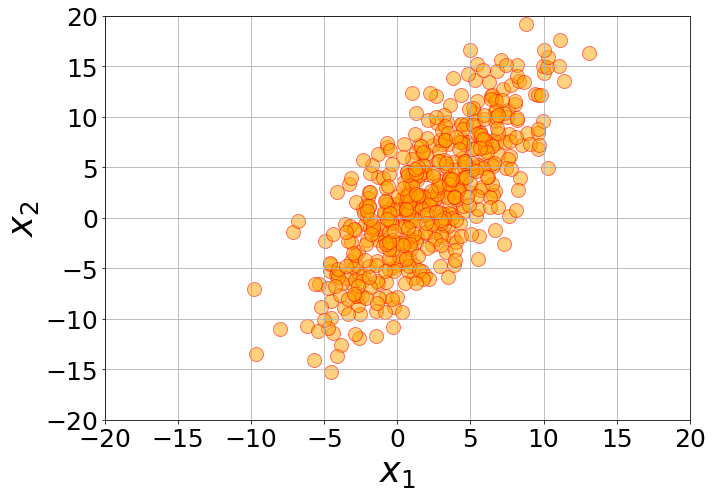

In [ ]:
plot_scatter(dataset1["label"],dataset1["label0"],r'$x_1$', r'$x_2$')

In [ ]:
def pca_np_1(x):

#centering data
  x_centered =data_normalisation(x) 
#calculating covariance matrix
  x_cov=covariance_calculation(x_centered)
#eigendecomposition
  eigenvals, eigenvecs = np.linalg.eig(x_cov)
#sorting
  i= np.argsort(eigenvals)[::-1]
  eigenvecs = eigenvecs[:,i]
  eigenvals= eigenvals[i]
  total_egnvalues = sum(eigenvals)
  var_exp = [(i/total_egnvalues) for i in sorted(eigenvals, reverse=True)]
  var_exp_ratio=round(sum(var_exp)*100, 1)

  return(eigenvals, eigenvecs,var_exp,var_exp_ratio)

In [ ]:
data_evals, data_evecs,data_exp,data_exp_ratio = pca_np_1(dataset1)
print("eigenvalues:", data_evals)
print("eigenvectors:", data_evecs)

eigenvalues: [1.74945875 0.25054125]
eigenvectors: [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [ ]:
print("variance:", data_exp)
print("variance_ration:", data_exp_ratio)

variance: [0.8747293729615666, 0.1252706270384334]
variance_ration: 100.0


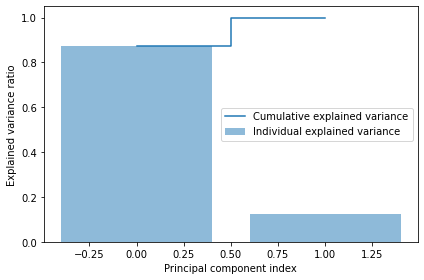

In [ ]:
import matplotlib.pyplot as plt
cum_sum_exp = np.cumsum(data_exp)
plt.bar(range(0,len(data_exp)), data_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

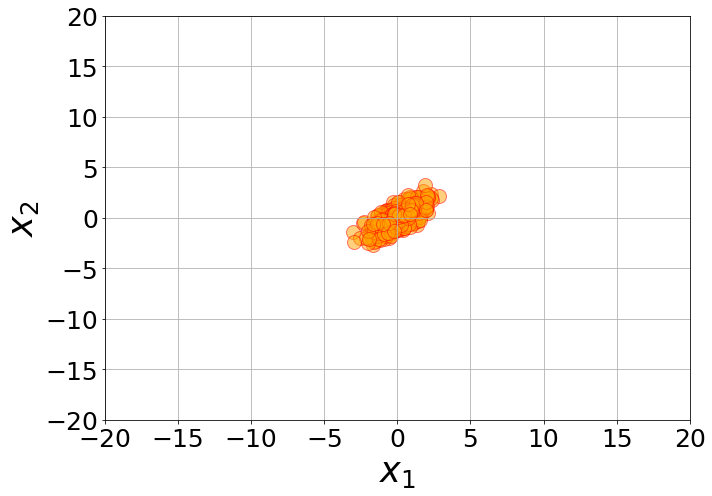

In [ ]:
plot_scatter(dataset1["label"],dataset1["label0"],r'$x_1$', r'$x_2$')

In [ ]:
class convers_pca():
    def __init__(self, no_of_components):
        self.no_of_components = no_of_components
        self.eigen_values = None
        self.eigen_vectors = None
        
    def transform(self, x):
        return np.dot(x - self.mean, self.projection_matrix.T)
    
    def inverse_transform(self, x):
        return np.dot(x, self.projection_matrix) + self.mean
    
    def fit(self, x):
        self.no_of_components = x.shape[1] if self.no_of_components is None else self.no_of_components
        self.mean = np.mean(x, axis=0)
        
        cov_matrix = np.cov(x - self.mean, rowvar=False)
        
        self.eigen_values, self.eigen_vectors = np.linalg.eig(cov_matrix)
        self.eigen_vectors = self.eigen_vectors.T
        
        self.sorted_components = np.argsort(self.eigen_values)[::-1]
        
        self.projection_matrix = self.eigen_vectors[self.sorted_components[:self.no_of_components]]
        self.explained_variance = self.eigen_values[self.sorted_components]
        self.explained_variance_ratio = self.explained_variance / self.eigen_values.sum()

In [ ]:
std = StandardScaler()
transformed = StandardScaler().fit_transform(dataset1)

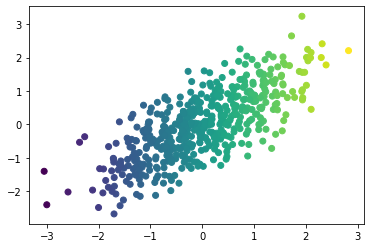

In [ ]:

plt.figure()
plt.scatter(transformed.T[0],transformed.T[1], c=y)

In [ ]:
pca = convers_pca(no_of_components=2)
pca.fit(transformed)

In [ ]:
pca.explained_variance

array([1.75296468, 0.25104334])

Text(0.5, 1.0, 'Scree Plot')

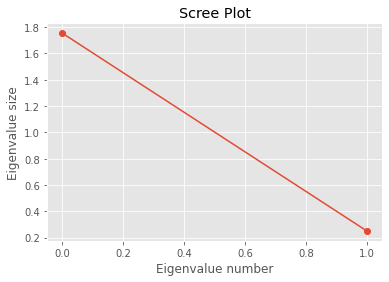

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("ggplot") 
plt.plot(pca.explained_variance, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")

In [ ]:
pca.explained_variance_ratio

array([0.87472937, 0.12527063])

In [ ]:
pca.eigen_values

array([1.75296468, 0.25104334])

In [ ]:
pca.eigen_vectors

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

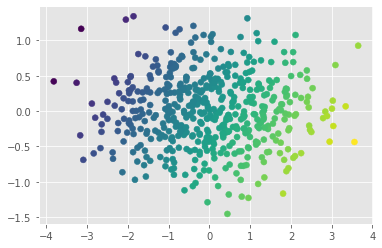

In [ ]:
x_std = pca.transform(transformed)
plt.figure()
plt.scatter(x_std[:, 0], x_std[:, 1], c=y)

In [ ]:
pca.eigen_vectors[:,:2]

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

находим проекции признаков на собственные вектора (через скалярное произведение)

In [ ]:
useful_pc = pca.eigen_vectors[:,:2] #keeping only the first 2 eigenvectors
principle_data = np.dot(dataset1.values, useful_pc)#dot product of the two terms
print(principle_data[:5])

[[-0.54931357  0.39642111]
 [ 0.22389613  0.57618194]
 [-0.20143235  1.05963685]
 [ 0.59250221  0.27511225]
 [-0.01330926 -0.9880046 ]]


In [ ]:
principle_data.T[0][:20]

array([-0.54931357,  0.22389613, -0.20143235,  0.59250221, -0.01330926,
        0.0989485 ,  0.11912212,  0.20826327, -0.12243807,  0.3187569 ,
       -0.01769283,  0.12416588, -0.49623012, -0.24052325, -0.07487877,
       -0.29277159, -0.29921866, -0.44043814, -0.30213747, -0.69421674])

там наоборот будет x1-->x2 так как выше label0 и label в дататесте нужно поменять мест

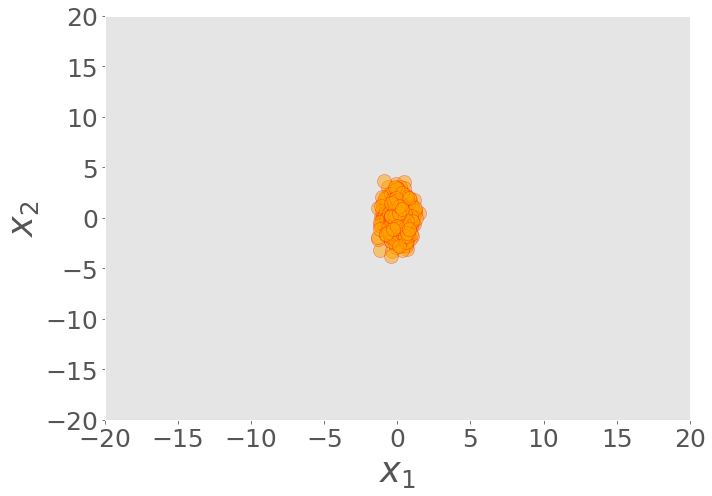

In [ ]:
plot_scatter(principle_data.T[0],principle_data.T[1],r'$x_1$', r'$x_2$')

In [ ]:
# Create dataframe
pca_df = pd.DataFrame(
    data=principle_data, 
    columns=['x1', 'x2'])
pca_df

,x1,x2
0,-0.549314,0.396421
1,0.223896,0.576182
2,-0.201432,1.059637
3,0.592502,0.275112
4,-0.013309,-0.988005
...,...,...
495,0.117685,1.174849
496,0.779818,-1.079002
497,-0.434015,1.464292
498,-0.305180,-1.097472


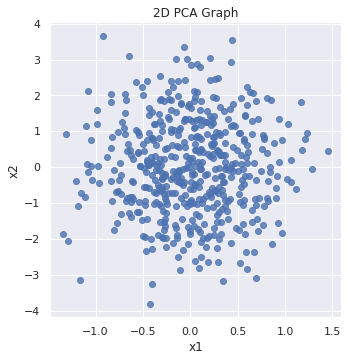

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
 
sns.lmplot(
    x='x1', 
    y='x2',
     
    data=pca_df, 
    #hue='target', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
data_pca = pca.fit_transform(transformed)
data_pca[:5]

array([[-0.39681812, -0.54986371],
       [-0.57675898,  0.22412036],
       [-1.06069807, -0.20163409],
       [-0.27538777,  0.59309561],
       [ 0.98899409, -0.01332259]])

In [ ]:
df_pca = pd.DataFrame(data_pca)
df_pca.head()

,0,1
0,-0.396818,-0.549864
1,-0.576759,0.224120
2,-1.060698,-0.201634
3,-0.275388,0.593096
4,0.988994,-0.013323


In [ ]:
cols_pca = [f'PC{i}' for i in range(1, pca.n_components_+1)]
cols_pca

['PC1', 'PC2']

In [ ]:
df_pca = pd.DataFrame(data_pca, columns=cols_pca, index=dataset1.index)
df_pca.head()

,PC1,PC2
0,-0.396818,-0.549864
1,-0.576759,0.224120
2,-1.060698,-0.201634
3,-0.275388,0.593096
4,0.988994,-0.013323


In [ ]:
import plotly.express as px

px.scatter(data_frame=df_pca, x='PC1', y='PC2')

In [ ]:
pca.explained_variance_ratio_

array([0.87472937, 0.12527063])

In [ ]:
pca.explained_variance_ratio_.cumsum()

array([0.87472937, 1.        ])

In [ ]:
df_weights = pd.DataFrame(pca.components_.T, columns=df_pca.columns, index=dataset1.columns)
df_weights

,PC1,PC2
label,-0.707107,0.707107
label0,-0.707107,-0.707107


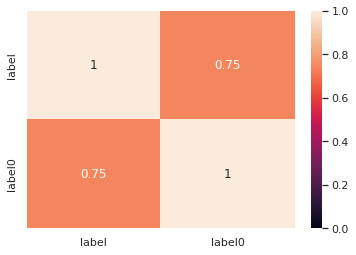

In [ ]:
df_corr = dataset1.corr()
sns.heatmap(df_corr, annot=True, vmin=0, vmax=1);

In [ ]:
df_pca.head()

,PC1,PC2
0,-0.396818,-0.549864
1,-0.576759,0.224120
2,-1.060698,-0.201634
3,-0.275388,0.593096
4,0.988994,-0.013323


In [ ]:
(df_weights['PC1']*dataset1.loc[0]).sum()

-0.39642110579539086

In [ ]:
dataset1.agg(['min', 'max'])

,label,label0
min,-3.046551,-2.674094
max,2.821952,3.232232


In [ ]:
import numpy as np

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
evr = pca.explained_variance_ratio_.round(2)

fig = px.scatter(df_pca, x='PC1', y='PC2',
                 hover_name=df_pca.index,
                labels={
                    'PC1': f'PC1 ~ {evr[0]}%',
                    'PC2': f'PC2 ~ {evr[1]}%'
                })

for i, feature in enumerate(df_pca.columns):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1],
        line=dict(color="red",width=3)
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )

fig.show()
